In [25]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from matplotlib import rc

In [26]:
exp_id = 'kitti_dladdu-4'
exp_dir = f'/work/shuhei-ky/exp/CenterNet/models/gmm/{exp_id}'

In [27]:
densities_kitti = torch.load(f"{exp_dir}/densities_dladdu_34_kitti.pt").cpu()
densities_bdd = torch.load(f"{exp_dir}/densities_dladdu_34_bdd.pt").cpu()
densities_coco = torch.load(f"{exp_dir}/densities_dladdu_34_coco.pt").cpu()

entropies_kitti = torch.load(f"{exp_dir}/entropies_dladdu_34_kitti.pt").cpu()
entropies_bdd = torch.load(f"{exp_dir}/entropies_dladdu_34_bdd.pt").cpu()
entropies_coco = torch.load(f"{exp_dir}/entropies_dladdu_34_coco.pt").cpu()

In [28]:
clrs = ['#1f77b4','#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#17becf']

sb.set_style('whitegrid')
sb.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})

rc('text', usetex=False)

In [29]:
def plot_density(densities1, densities2, binrange, separate_ID=False):
    clrs = ['#1f77b4','#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#17becf']
    sb.set_style('whitegrid')

    plt.figure(figsize=(2.5,2.5/1.6))
    plt.tight_layout()

    range = dict(bins=30, binrange=binrange, element="step", fill=True, alpha=0.7)
    kw_separate_id = dict(hue="category", multiple="stack",
                hue_order=[1, 0],
                palette=[sb.color_palette()[4], sb.color_palette()[0]]) if separate_ID else dict(color=sb.color_palette()[0])

    sb.histplot(densities1, **kw_separate_id,
                stat='probability', kde=False, **range, label="dummy", legend=False) # 'Dirty-MNIST (In-distribution)')
    sb.histplot(densities2, color=sb.color_palette()[1],
                stat='probability', kde=False, **range, label="dummy", legend=False) #, label='Fashion-MNIST (OoD)')


    plt.xlabel('Log Density', fontsize=12)
    plt.ylabel('Fraction', fontsize=12)


def plot_entropy(entropies1, entropies2, separate_ID=False):
    common_kwargs = dict(stat='probability', kde=False, bins=12, binrange=[0,2.4], label="dummy", legend=False, element="step", alpha=0.7)
    id_kwargs = dict(
              hue="category", multiple="stack", 
              palette=[sb.color_palette()[0], sb.color_palette()[4]]) if separate_ID else dict(color=sb.color_palette()[0]) 

    fig, axes = plt.subplots(2, 1, sharex=True, figsize=(2.5,2.5/1.6), gridspec_kw={'height_ratios': [1, 3]}, constrained_layout=True)
    fig.subplots_adjust(hspace=0.30)  # adjust space between axes

    for ax in axes:
        sb.histplot(entropies1, **id_kwargs,
                    **common_kwargs, ax=ax)
        sb.histplot(entropies2, color=sb.color_palette()[1],
                    **common_kwargs, ax=ax)

    axes[0].set_ylim(0.4, 0.55)  # outliers only
    axes[1].set_ylim(0, .15)  # most of the data

    axes[0].spines['bottom'].set_visible(False)
    axes[1].spines['top'].set_visible(False)
    axes[0].set_ylabel("")
    axes[1].set_ylabel("Fraction", fontsize=12)
    axes[1].set_xlabel("Entropy", fontsize=12)

    axes[1].yaxis.set_label_coords(-0.04, 0.5, fig.transFigure)

    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    axes[0].plot([0, 1], [0, 0], transform=axes[0].transAxes, **kwargs)
    axes[1].plot([0, 1], [1, 1], transform=axes[1].transAxes, **kwargs)

    fig.set_size_inches(2.5,2.5/1.6)

    return fig, axes


separate_ID = False

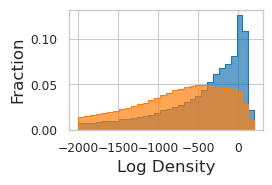

In [30]:
plot_density(densities_kitti, densities_bdd, binrange=[-2000, 200], separate_ID=separate_ID)
plt.savefig(f'{exp_dir}/densities_hist_kitti_vs_bdd.png', bbox_inches='tight')

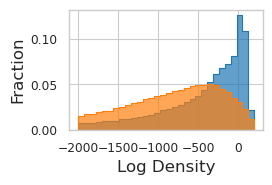

In [31]:
plot_density(densities_kitti, densities_coco, binrange=[-2000, 200], separate_ID=separate_ID)
plt.savefig(f'{exp_dir}/densities_hist_kitti_vs_coco.png', bbox_inches='tight')

/tmp/ipykernel_1381743/1811994853.py:30: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace=0.30)  # adjust space between axes


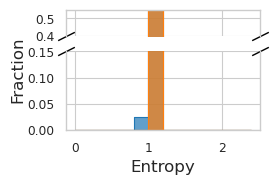

In [32]:
plot_entropy(entropies_kitti, entropies_bdd, separate_ID=separate_ID)
plt.savefig(f'{exp_dir}/entropies_hist_kitti_vs_bdd.png', bbox_inches='tight')

/tmp/ipykernel_1381743/1811994853.py:30: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace=0.30)  # adjust space between axes


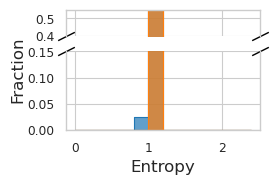

In [33]:
plot_entropy(entropies_kitti, entropies_coco, separate_ID=separate_ID)
plt.savefig(f'{exp_dir}/entropies_hist_kitti_vs_coco.png', bbox_inches='tight')